In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [29]:
class hysterese:
    def __init__(self,path) -> None:
        data=np.genfromtxt(path).T
        self.I=data[0]
        self.B=data[1]
        self.phi=data[2]
        self.sat,self.koer = self.get_points()
        pass
    def get_points(self):
        sat = [(np.argmax(self.phi),np.max(self.phi)),(np.argmin(self.phi),np.min(self.phi))]
        koer = []
        for i in range(len(self.phi)-1):
            if np.sign(self.phi[i])!=np.sign(self.phi[i+1]):
                m=(self.phi[i]-self.phi[i+1])/(self.B[i]-self.B[i+1])
                b=-m*self.B[i]+self.phi[i]
                koer.append(-b/m)
        return sat,koer
        
    def plot(self):
        fig = plt.figure(figsize=(7, 5))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        # fig1.set_title(f"Laser")
        fig1.set_ylabel("Kerr Winkel in $^°$")
        fig1.set_xlabel("B in mT")
        # fig1.set_xlim(-5,185)
        # fig1.set_ylim(0,9.5)
        plt.tight_layout()
        plt.plot(self.B,self.phi,c="C0")
        for sat in self.sat:
            plt.scatter(self.B[sat[0]],sat[1],label="saturation",c="C1")
        for koer in self.koer:
            plt.scatter(self.koer,[0 for _ in self.koer],c="C2")
        # plt.savefig(f"plots/{title}.pdf")
        plt.show()


[19.072798634812287, 11.860346534653464]


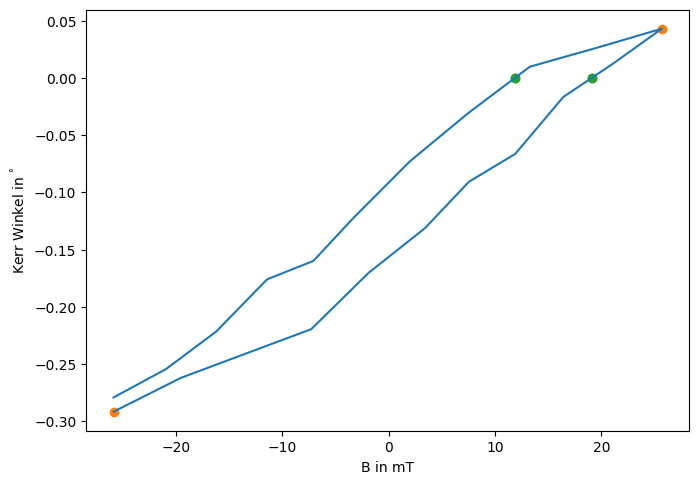

[]


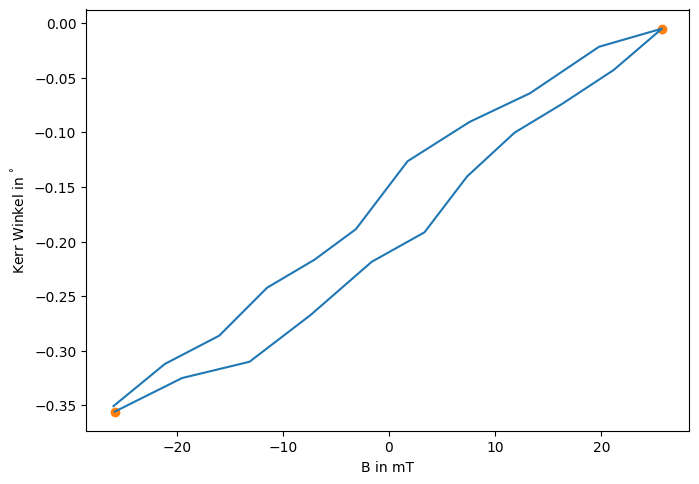

[24.650000000000002, 25.487962962962964]


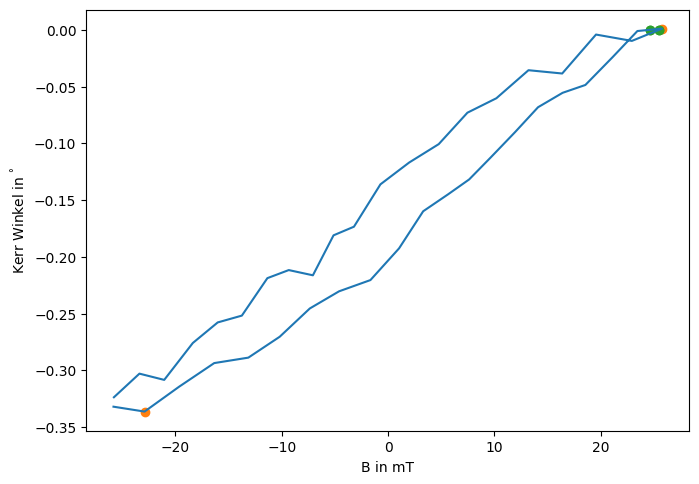

[24.406020408163265, 23.01181818181818]


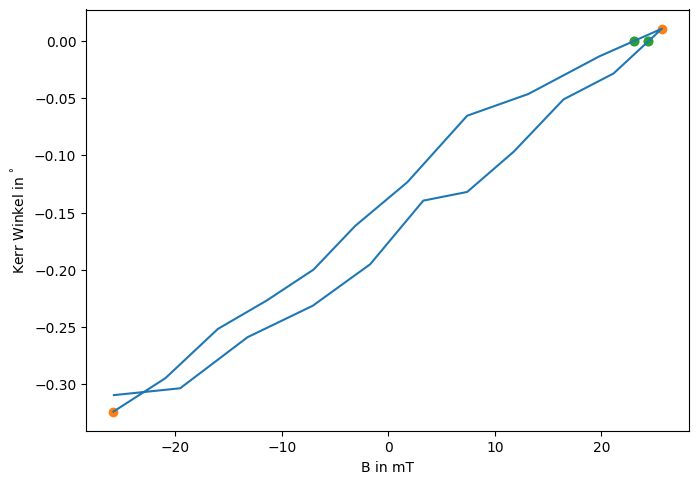

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 49: invalid start byte

In [28]:
for run in [1,2,3,4,5]:
    hyst1=hysterese(f"data/hysterese/{run}.dat")
    hyst1.plot()